**<h1>Manga AI 4x Upscale (ESRGAN + 4x_eula_digimanga_bw_v2_nc1_307k)<h1>**

Версія: 1.1 [2023/06/20]
<br>Автор записника: Spladenly (t.me/spladenly)
<br><br>"4x_eula_digimanga_bw_v2_nc1_307k" це модель ШІ, яка була зроблена спеціально для апскейлу манґи. Результат дуже цікавий і на відміну від waifu2x, вихідні файли не великі. Цій моделі потрібна досить потужна відеокарта від Nvidia (на жаль, ESRGAN не підтримує відеокарти від AMD). Тож, цей записник дасть Вам можливість запускати цю модель на серверах Google, використовуючи їхню безкоштовну потужну відеокарту.
<br><br>Використані проєкти: ESRGAN від joeyballentine та модель ШІ “4x_eula_digimanga_bw_v2_nc1_307k” від “end user license agreement#9756”.

> Важливо: Ця модель ШІ підтримує виключно чорно-білі картинки. Усі кольорові картинки на виході будуть чорно-білими.
---

> Важливо: Під час запуску скрипту, треба буде надати доступ до свого Google Drive. Цей дозвіл буде використовуватися виключно для доступу до папок: “/ESRGAN/input” та “/ESRGAN/output”. Жодні інші персональні папки або файли не використовуватимуться.

Структура папок на Google Drive:

/ESRGAN/input (сюди треба вивантажувати сторінки манґи; можна завантажувати у підпапки) *
<br>/ESRGAN/output (тут з'являтимуться сторінки манґи після апскейлу)
<br><br> * Файли, які підтримуються: bmp, dib, jpeg, jpg, jpe, jp2, png, webp, pbm, pgm, ppm, pxm, pnm, pfm, sr, ras, tiff, tif, exr, hdr, pic, gif, tga.
> Зверніть увагу: Google Drive працює із затримкою. Якщо Ви щойно завантажили або видалили файли, Google Colab може не бачити зміни до 1 хвилини. Так само це працює і в іншу сторону. Якщо обробка щойно закінчилася, Ви не побачите нові файли на Google Drive відразу. Зачекайте.

Щоб запустити скрипт, просто натисніть на цю кнопку.

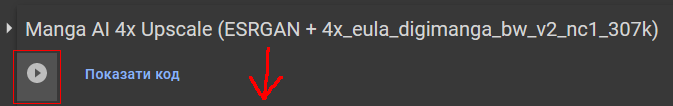

In [ ]:
#@title Manga AI 4x Upscale (ESRGAN + 4x_eula_digimanga_bw_v2_nc1_307k)

import os
import torch
from google.colab import drive
from pathlib import Path

def init_dirs():
  Path("/content/gdrive/MyDrive/ESRGAN").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/input").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/output").mkdir \
   (parents=True, exist_ok=True)

# Checks recursively whether a folder contains any files
def dir_contains_files(path):
  for root, dirs, files in os.walk(path):
    if files:
      return True
  return False

def ai_process():
  !python ESRGAN/upscale.py -se -i /content/gdrive/MyDrive/ESRGAN/input \
  -o /content/gdrive/MyDrive/ESRGAN/output \
  ESRGAN/models/4x_eula_digimanga_bw_v2_nc1_307k.pth

# For easier localization
gdrive_connecting_text = "Триває підключення Google Drive..."
gpu_not_available_text = "Цей сеанс не має відеокарти. Щоб \
підключити відеокарту, натисніть:\n'Змінити' -> 'Налаштування \
записника' ->\n'Апаратне прискорення' = GPU;\n'Тип графічного \
процесора' = T4\nПісля цього запустить цей скрипт ще раз."
created_dirs_text = "Створено папки '/ESRGAN/input' та \
'/ESRGAN/output' на Вашому Google Drive.\nБудь ласка, вивантажте \
сторінки манґи до '/ESRGAN/input' і запустить цей скрипт ще раз."
no_pages_found_text = "Не знайдено жодних сторінок у папці \
'/ESRGAN/input' на Вашому Google Drive.\nБудь ласка, вивантажте сторінки \
манґи до '/ESRGAN/input' і запустить цей скрипт ще раз."
finished_ai_text = "Обробку завершено. Результат можна завантажити з \
'/ESRGAN/output' на Вашому Google Drive.\nДля обробки інших сторінок, \
запустить цей скрипт ще раз.\nЯкщо у найближчий час Ви більше \
не плануєте обробляти інші сторінки, будь ласка, закрийте поточний \
сеанс.\nЦе можна зробити, натискаючи на:\nперевернутий трикутник (біля \
написів 'RAM' та 'Диск' у правому верхньому кутку) -> 'Відключити й \
видалити середовище виконання'.\nЦе розблокує ресурси зарезервовані \
під цей сеанс для інших користувачів."

def main():
  if not torch.cuda.is_available():
    print(gpu_not_available_text)
    return

  if not os.path.exists('/content/gdrive/MyDrive'):
    print(gdrive_connecting_text)
    drive.mount('/content/gdrive')

  if not os.path.exists('ESRGAN'):
    !git clone https://github.com/Spladenly/ESRGAN

  if not os.path.exists('/content/gdrive/MyDrive/ESRGAN'):
    init_dirs()
    print(created_dirs_text)
    return

  if not (dir_contains_files('/content/gdrive/MyDrive/ESRGAN/input')):
    print(no_pages_found_text)
    return

  ai_process()

  print(finished_ai_text)

if __name__ == '__main__':
  main()


Хоча, можна відразу вивантажувати безпосередньо картинки до папки /ESRGAN/input, якщо Вам треба обробити багато сторінок, через технічні причини, швидше вивантажувати архіви, ніж 100+ файлів. Тож, опціонально, ви можете вивантажувати ZIP архіви до папки /ESRGAN/input і запускати наступний скрипт. Він розпакує усі ZIP архіви (у окремі папки) і перенесе оригінальні ZIP файли до кошику.

In [ ]:
#@title Розпакувати усі ZIP архіви у папці /ESRGAN/input

import os
import shutil
import zipfile
from google.colab import drive

# For easier localization
gdrive_connecting_text = "Триває підключення Google Drive..."
found_text = "Знайдено"
files_text = "файл(-ів)."
extracting_text = "Розпакування..."
done_text = "Готово."

def main():
  if not os.path.exists('/content/gdrive/MyDrive'):
    print(gdrive_connecting_text)
    drive.mount('/content/gdrive')

  input_dir = '/content/gdrive/MyDrive/ESRGAN/input'

  zip_files = [f for f in os.listdir(input_dir) if f.endswith('.zip') or \
               f.endswith('.cbz')]

  print(f"{found_text} {len(zip_files)} {files_text}")
  print(extracting_text)

  for zip_file in zip_files:
      zip_path = os.path.join(input_dir, zip_file)

      extract_folder = os.path.join(input_dir, \
                                    os.path.splitext(zip_file)[0])
      os.makedirs(extract_folder, exist_ok=True)

      with zipfile.ZipFile(zip_path, 'r') as zf:
          zf.extractall(extract_folder)

      os.remove(zip_path)

  print(done_text)

if __name__ == '__main__':
  main()